In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0


### load base model

In [2]:
base = EfficientNetB0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet',
)
base.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 29s 2us/step


### build head

In [3]:
model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


### compile

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### data sets

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Administrator\Desktop\5th-yr-project\ml_data\Tomatoes Diseases Dataset\Dataset Train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=42,
)

Found 12813 files belonging to 10 classes.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Administrator\Desktop\5th-yr-project\ml_data\Tomatoes Diseases Dataset\Dataset Test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
)

Found 3198 files belonging to 10 classes.


In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)

### Training the head

In [9]:
history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


401/401 ━━━━━━━━━━━━━━━━━━━━ 147s 341ms/step - accuracy: 0.6301 - loss: 1.1257 - val_accuracy: 0.8724 - val_loss: 0.3972
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 114s 284ms/step - accuracy: 0.8219 - loss: 0.5226 - val_accuracy: 0.8940 - val_loss: 0.3121
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 129s 322ms/step - accuracy: 0.8472 - loss: 0.4476 - val_accuracy: 0.9134 - val_loss: 0.2652
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 129s 323ms/step - accuracy: 0.8586 - loss: 0.4027 - val_accuracy: 0.9228 - val_loss: 0.2323
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 121s 302ms/step - accuracy: 0.8730 - loss: 0.3692 - val_accuracy: 0.9209 - val_loss: 0.2288
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 124s 309ms/step - accuracy: 0.8694 - loss: 0.3612 - val_accuracy: 0.9221 - val_loss: 0.2257
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 119s 298ms/step - accuracy: 0.8886 - loss: 0.3169 - val_accuracy: 0.9306 - val_loss: 0.2056
Epoch 8/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 116s 290ms/step - accuracy: 0.8872 - loss: 0.31

### unfreeze and fine tuning

In [10]:
base.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # lower LR
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history2 = model.fit(
    train_ds, validation_data=val_ds,
    epochs=20,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)

Epoch 1/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 644s 2s/step - accuracy: 0.4357 - loss: 3.4041 - val_accuracy: 0.7370 - val_loss: 0.9919
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.6646 - loss: 1.4110 - val_accuracy: 0.8058 - val_loss: 0.6703
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.7403 - loss: 1.0227 - val_accuracy: 0.8515 - val_loss: 0.5060
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 569s 1s/step - accuracy: 0.7876 - loss: 0.7606 - val_accuracy: 0.8730 - val_loss: 0.4082
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.8215 - loss: 0.6357 - val_accuracy: 0.8927 - val_loss: 0.3412
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 666s 2s/step - accuracy: 0.8465 - loss: 0.5226 - val_accuracy: 0.9084 - val_loss: 0.2902
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.8612 - loss: 0.4562 - val_accuracy: 0.9228 - val_loss: 0.2541
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 928s 2s/step - accuracy: 0.8861 - loss: 0.3948 - val_accu

### model evaluation

In [11]:
# model evaluation on training set
training_loss, training_accuracy = model.evaluate(train_ds)

401/401 ━━━━━━━━━━━━━━━━━━━━ 140s 348ms/step - accuracy: 0.9978 - loss: 0.0083


In [12]:
print(f"Training Loss: {training_loss}")
print(f"Training Accuracy: {training_accuracy}")

Training Loss: 0.007153354585170746
Training Accuracy: 0.9985171556472778


In [13]:
# model evaluation on validation set
validation_loss, validation_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 313ms/step - accuracy: 0.9683 - loss: 0.0995
Validation Loss: 0.0915895625948906
Validation Accuracy: 0.9696685671806335


### saving the model

In [14]:
model.save("model.h5")

In [15]:
model.save("model.keras")

In [17]:
import json
with open("history.json", "w") as f:
    json.dump(history2.history, f, indent=4)

### Accuracy Visualization

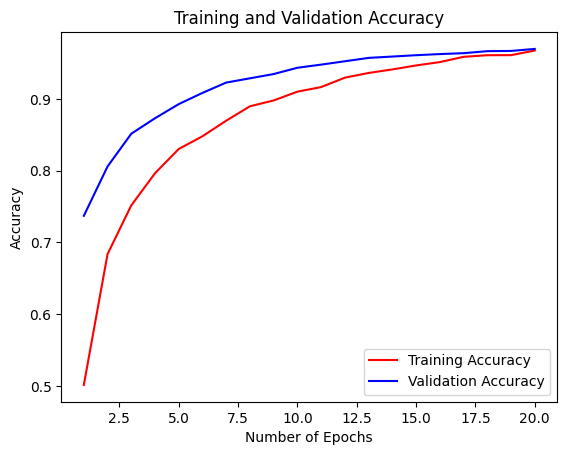

In [22]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1, len(history2.history['accuracy']) + 1)]
plt.plot(epochs, history2.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(epochs, history2.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [25]:
test_set = val_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Administrator\Desktop\5th-yr-project\ml_data\Tomatoes Diseases Dataset\Dataset Test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
)


Found 3198 files belonging to 10 classes.


In [27]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step


(array([[9.9930871e-01, 2.9529747e-06, 2.8877298e-07, ..., 6.3648292e-07,
         1.4821636e-10, 5.4559609e-07],
        [9.9990726e-01, 5.0194547e-05, 4.7455038e-07, ..., 6.9709657e-08,
         9.1472368e-12, 2.4682714e-10],
        [9.9998748e-01, 3.0151622e-08, 5.6675610e-12, ..., 8.9670998e-08,
         5.6093553e-17, 3.2425763e-14],
        ...,
        [1.4310675e-16, 1.7231297e-10, 2.2952426e-12, ..., 1.1375316e-14,
         3.8364079e-13, 9.9999964e-01],
        [1.0388949e-09, 1.6397331e-11, 1.6882706e-07, ..., 4.4038502e-11,
         1.1256730e-12, 9.9999988e-01],
        [1.3491337e-13, 3.6529843e-07, 2.9003321e-08, ..., 5.3232977e-11,
         6.5202070e-09, 9.9974483e-01]], dtype=float32),
 (3198, 10))

In [28]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories  

<tf.Tensor: shape=(3198,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9])>

In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories


<tf.Tensor: shape=(3198,), dtype=int32, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int32)>

In [35]:
Y_true = true_categories 


In [23]:
class_names = val_ds.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report = classification_report(Y_true, predicted_categories, target_names=class_names)
print(classification_report)

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.97      1.00      0.98       425
                        Tomato_Early_blight       0.97      0.86      0.91       200
                         Tomato_Late_blight       0.96      0.98      0.97       381
                           Tomato_Leaf_Mold       0.97      0.97      0.97       190
                  Tomato_Septoria_leaf_spot       0.97      0.96      0.96       354
Tomato_Spider_mites_Two_spotted_spider_mite       0.94      0.96      0.95       335
                        Tomato__Target_Spot       0.94      0.93      0.93       280
      Tomato__Tomato_YellowLeaf__Curl_Virus       1.00      0.99      0.99       641
                Tomato__Tomato_mosaic_virus       0.96      0.96      0.96        74
                             Tomato_healthy       0.99      0.99      0.99       318

                                   accuracy                    

In [42]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape

(10, 10)

### Cunfussion Matrix Visualization

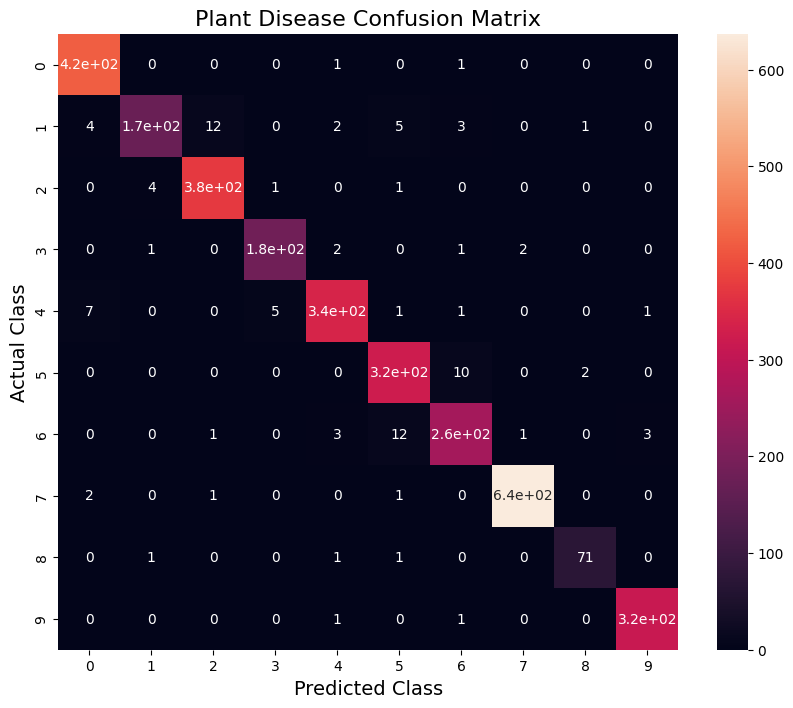

In [47]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,annot_kws={"size":10})
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.title('Plant Disease Confusion Matrix', fontsize=16)
plt.show()

### Loading Model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
model = tf.keras.models.load_model("model.keras")

c:\Users\Administrator\anaconda3\envs\ml_5th_year\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 217 variables whereas the saved optimizer has 432 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,718,133 (33.26 MB)

 Trainable params: 4,338,054 (16.55 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 4,338,056 (16.55 MB)

### Visualizing of images

In [7]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.8/39.5 MB 1.1 MB/s eta 0:00:35
   - -------------------------------------- 1.3/39.5 MB 1.4 MB/s eta 0:00:27
   - -------------------------------------- 1.6/39.5 MB 1.4 MB/s eta 0:00:27
   - -------------------------------------- 1.8/39.5 MB 1.3 MB/s eta 0:00:29
   -- ------------------------------------- 2.1/39.5 MB 1.4 MB/s eta 0:00:27
   -- ------------------------------------- 2.4/39.5 MB 1.4 MB/s eta 0:00:27
   -- ------------------------------------- 2.6/39.5 MB 1.4 MB/s eta 0:00:27
   --- ------------------------------------ 3.1/39.5 MB 1.4 MB/s eta 0:00:27
   --- --------------------

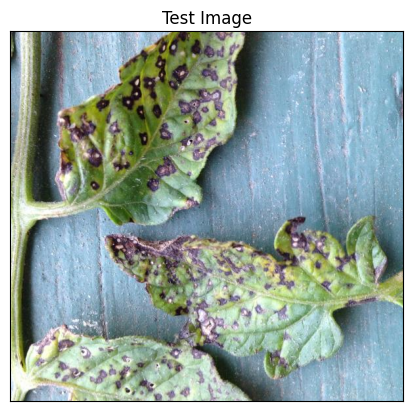

In [36]:
import cv2
image_path = r"C:\Users\Administrator\Desktop\5th-yr-project\back-end app\images\hgic-veg-septoria-leaf-spot-600.jpg"
# Reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [39]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [40]:
predictions = model.predict(input_arr)
predictions, predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


(array([[1.3979655e-04, 9.5965073e-02, 5.7944417e-02, 2.8075996e-01,
         5.6281173e-01, 6.2090039e-05, 5.6214625e-04, 3.9712486e-06,
         1.3447482e-03, 4.0600196e-04]], dtype=float32),
 (1, 10))

In [41]:
result_index = np.argmax(predictions)
result_index

np.int64(4)

In [ ]:
class_names = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [42]:
# Displaying Result of disease prediction
models_predictions = class_names[result_index]
models_predictions

'Tomato_Septoria_leaf_spot'